# Задание 1

Постройте нейронную сеть из одного нейрона и обучите её на датасетах nn_0.csv и nn_1.csv. 

Насколько отличается результат обучения и почему? 
Сколько потребовалось эпох для обучения? 
Попробуйте различные функции активации и оптимизаторы.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

import keras
from keras import models
from keras import layers
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\Kristijan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Kristijan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Kristijan\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Kristijan\anaconda3\lib\site-packages\tensorflow\python\fra

In [3]:
def get_data_plot(data):
    fig, axes = plt.subplots()
    axes.scatter(data[data['class'] == -1]['X1'],
              data[data['class'] == -1]['X2'],
              c='b')
    axes.scatter(data[data['class'] == 1]['X1'],
              data[data['class'] == 1]['X2'],
              c='c')
    axes.set_ylabel('X2')
    axes.set_xlabel('X1')
    plt.show()
    
lb = LabelBinarizer()

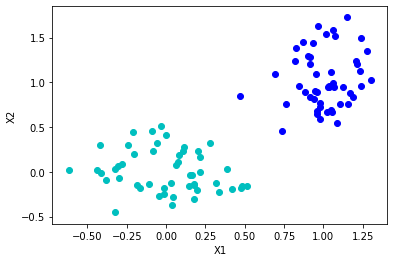

In [4]:
data_1 = pd.read_csv('D:\FAX\mashin_ljorning\Lab_2_Neural_networks/nn_0.csv')
get_data_plot(data_1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
        data_1.drop(['class'], axis=1), 
        data_1['class'], 
        random_state=11,
        test_size=0.3)

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

activation_list = ['sigmoid', 'relu', 'softmax']
optimizer_list = ['adam', 'adamax', 'RMSprop', 'SGD']

for activation in activation_list:
    for optimizer in optimizer_list:
        visible = layers.Input(shape=(2,))
        hidden = layers.Dense(1, activation=activation)(visible)
        model = models.Model(inputs=visible, outputs=hidden)
        model.compile(
            optimizer = optimizer,
            loss = "binary_crossentropy",
            metrics = ["accuracy"]
        )

        model.fit(x_train, y_train, epochs=20, batch_size=2, validation_split=0.2, verbose=0)

        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f'activation: {activation}  optimizer: {optimizer}  accuracy: {test_acc}')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

activation: sigmoid  optimizer: adam  accuracy: 0.6666666865348816
activation: sigmoid  optimizer: adamax  accuracy: 0.20000000298023224
activation: sigmoid  optimizer: RMSprop  accuracy: 0.0
activation: sigmoid  optimizer: SGD  accuracy: 0.8999999761581421
activation: relu  optimizer: adam  accuracy: 0.0
activation: relu  optimizer: adamax  accuracy: 0.6666666865348816
activation: relu  optimizer: RMSprop  accuracy: 0.6333333253860474
activation: relu  optimizer: SGD  accuracy: 0.8333333134651184
activation: softmax  optimizer: adam  accuracy: 0.4333333373069763
activation: softmax  optimizer: adamax  accuracy: 0.4333333373069763
activation: softmax  optimizer: RMSprop  accuracy: 0.4333333373069763
activation: softmax  optimizer: SGD  accuracy: 0.4333333373069763


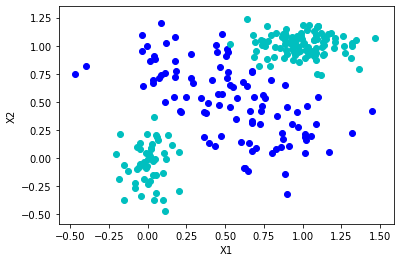

In [6]:
data_2 = pd.read_csv('D:\FAX\mashin_ljorning\Lab_2_Neural_networks/nn_1.csv')

get_data_plot(data_2)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
        data_2.drop(['class'], axis=1), 
        data_2['class'], 
        random_state=11,
        test_size=0.3)

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

activation_list = ['sigmoid', 'relu', 'softmax']
optimizer_list = ['adam', 'adamax', 'RMSprop', 'SGD']

for activation in activation_list:
    for optimizer in optimizer_list:
        visible = layers.Input(shape=(2,))
        hidden = layers.Dense(1, activation=activation)(visible)
        model = models.Model(inputs=visible, outputs=hidden)
        model.compile(
            optimizer = optimizer,
            loss = "binary_crossentropy",
            metrics = ["accuracy"]
        )

        model.fit(x_train, y_train, epochs=20, batch_size=2, validation_split=0.2, verbose=0)

        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
        print(f'activation: {activation}  optimizer: {optimizer}  accuracy: {test_acc}')

activation: sigmoid  optimizer: adam  accuracy: 0.6000000238418579
activation: sigmoid  optimizer: adamax  accuracy: 0.4533333480358124
activation: sigmoid  optimizer: RMSprop  accuracy: 0.6133333444595337
activation: sigmoid  optimizer: SGD  accuracy: 0.3733333349227905
activation: relu  optimizer: adam  accuracy: 0.0
activation: relu  optimizer: adamax  accuracy: 0.07999999821186066
activation: relu  optimizer: RMSprop  accuracy: 0.46666666865348816
activation: relu  optimizer: SGD  accuracy: 0.0
activation: softmax  optimizer: adam  accuracy: 0.6133333444595337
activation: softmax  optimizer: adamax  accuracy: 0.6133333444595337
activation: softmax  optimizer: RMSprop  accuracy: 0.6133333444595337
activation: softmax  optimizer: SGD  accuracy: 0.6133333444595337


Модель работает лучше для данных nn_0 чем nn_1. Потребовалось 20 эпох для обучения.

Для данных nn_0 лучше всех подошли функция активации sigmoid и оптимизатор SGD.

Для данных nn_1 лучше всех подошли функция активации sigmoid и оптимизатор adamax.

# Задание 2

Модифицируйте нейронную сеть из пункта 1, чтобы достичь минимальной ошибки на датасете nn_1.csv. 

Почему были выбраны именно такие гиперпараметры?

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
        data_2.drop(['class'], axis=1), 
        data_2['class'], 
        random_state=11,
        test_size=0.3)

y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)


visible = layers.Input(shape=(2,))
hidden = layers.Dense(8, activation='relu', activity_regularizer=keras.regularizers.l2(0.02))(visible)
hidden_2 = layers.Dense(1, activation='relu')(hidden)
model = models.Model(inputs=visible, outputs=hidden_2)
model.compile(
    optimizer = 'SGD',
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

model.fit(x_train, y_train, epochs=12, batch_size=2, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc}')

Train on 140 samples, validate on 35 samples
Epoch 1/12
140/140 [==============================] - 0s 3ms/step - loss: 6.5801 - accuracy: 0.1214 - val_loss: 7.5170 - val_accuracy: 0.0000e+00
Epoch 2/12
140/140 [==============================] - 0s 945us/step - loss: 5.9791 - accuracy: 0.0000e+00 - val_loss: 7.5061 - val_accuracy: 0.0000e+00
Epoch 3/12
140/140 [==============================] - 0s 1ms/step - loss: 5.9692 - accuracy: 0.0000e+00 - val_loss: 7.4972 - val_accuracy: 0.0000e+00
Epoch 4/12
140/140 [==============================] - 0s 948us/step - loss: 5.9612 - accuracy: 0.0000e+00 - val_loss: 7.4899 - val_accuracy: 0.0000e+00
Epoch 5/12
140/140 [==============================] - 0s 969us/step - loss: 5.9547 - accuracy: 0.0000e+00 - val_loss: 7.4840 - val_accuracy: 0.0000e+00
Epoch 6/12
140/140 [==============================] - 0s 934us/step - loss: 5.9494 - accuracy: 0.0000e+00 - val_loss: 7.4792 - val_accuracy: 0.0000e+00
Epoch 7/12
140/140 [==============================]

Для достижения минимальной ошибки на датасете nn_1.csv был добавлен дополнительный полносвязный слой из 8 нейронов с функцией активации relu и функцией регуляризации для того, чтобы применять штрафы к параметрам слоя.

# Задание 3

Создайте классификатор на базе нейронной сети для набора данных MNIST (так же можно загрузить с помощью torchvision.datasets.MNIST, tensorflow.keras.datasets.mnist.load_data и пр.). 

Оцените качество классификации.

In [9]:
num_train = 60000
num_test = 10000

height, width, depth = 28, 28, 1

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(num_train, height * width)
x_test = x_test.reshape(num_test, height * width)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# Normalizing
x_train /= 255
x_test /= 255

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [10]:
visible = layers.Input(shape=(height * width,))
hidden = layers.Dense(512, activation='relu')(visible)
hidden_2 = layers.Dense(512, activation='relu')(hidden)
out = layers.Dense(10, activation='softmax')(hidden_2)

model = models.Model(inputs=visible, outputs=out)
model.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 17s 319us/step - loss: 0.2316 - accuracy: 0.9322 - val_loss: 0.1037 - val_accuracy: 0.9690
Epoch 2/15
54000/54000 [==============================] - 17s 322us/step - loss: 0.0833 - accuracy: 0.9742 - val_loss: 0.0705 - val_accuracy: 0.9792
Epoch 3/15
54000/54000 [==============================] - 19s 354us/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.0625 - val_accuracy: 0.9820
Epoch 4/15
54000/54000 [==============================] - 16s 291us/step - loss: 0.0380 - accuracy: 0.9875 - val_loss: 0.0793 - val_accuracy: 0.9777
Epoch 5/15
54000/54000 [==============================] - 15s 278us/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0814 - val_accuracy: 0.9790
Epoch 6/15
54000/54000 [==============================] - 16s 299us/step - loss: 0.0211 - accuracy: 0.9925 - val_loss: 0.0773 - val_accuracy: 0.9793
Epoch 7/15
54000/54000 [==============================] -

В итоге точность модели получилась ~ 98%